# ToolName: A comprehensive model for mixed volatile (H$_2$O-CO$_2$) solubility in silicate melts – A python library
## (For Earth and Space Sciences, an AGU Journal)
***
## Kayla Iacovino$^1$, Simon Matthews$^2$, Gordon M. Moore$^1$, Florence Bégué$^3$, Christy B. Till$^4$  and ??? Peter Fox? Mark Ghiorso? Aaron Wolf?
$^1$Jacobs/NASA Johnson Space Center, Houston, TX 77058, USA
<br>$^2$Simon affiliation
<br>$^3$Florence affiliation
<br>$^4$School of Earth and Space Exploration (SESE), Arizona State University, Phoenix, AZ

# Key Points
1. First key point
2. Second
3. Third

# Abstract

Thermodynamic modeling has been the backbone of interpreting geologic data and modelling geologic systems for decades. However, more recent advancements in computational capabilities and a marked increase in researchers' accessibility to computing tools has outpaced the functionality and extensibility of currently available modeling tools. Here we present the first comprehensive modelling tool for H$_2$O, CO$_2$, and mixed (H$_2$O-CO$_2$) solubility in silicate melts that: a) allows users access to all commonly used models, inlcuding easy intercomparison between models; b) provides universal functionality for all models (e.g., functions for calculting saturation pressures, degassing paths, etc.); c) can process large datasets (1,000's of samples) automatically; d) outputs computed data into an excel spreadsheet for simple post-modelling analysis; e) integrates advanced plotting capabilities directly within the tool; and f) provides all of these within the framework of a python library, making the tool extensible by the user and allowing any of the model functions to be incorporated into any other code capable of calling python. The tool is presented within this manuscript, which is a Jupyter notebook containing worked examples accessible to python users with a range of skill levels. The [toolname] python library is open-source and available for download at [URL].

# Plain Language Summary

# Gordon, can you work on this section?

# 1. Introduction
H$_2$O and CO$_2$ are the most abundant volatile species in silicate melts and have profound effects on the phase equilibria, melting temperatures, and viscosity of magmas in addition to being drivers of explosive volcanism. Volatile elements are also key ingredients for Earth-based life, and so have become a focus of planetary exploration aimed at understanding how life came to exist on Earth and where we might find life elsewhere in the solar system and beyond.

History of volatile solubility models [some text from Gordon]

Currently available tools and issues: Dixon (1995); Moore (1998); Dixon (1997); Shishkina et al (2014); Iacono_marziano (2012); Egucghi and Dasgupta (2018); Zhang and Duan (2009); Allison et al (2019); Papale; MagmaSat; SolEx

List of models implemented in this code:
* MagmaSat (MELTS v. 1.2.0; Ghiorso and Gualda, 2015)
* Dixon (1995)
* Shishkina et al. (2014)
* Moore et al. (1998)
* ...

The notebook features the follow workflow and capabilities:
* Read in melt composition from an excel spreadsheet
* Ability to model multiple liquid compositions at once
* Advanced plotting capabilities
* Saturation curves (isobars) and isopleths 
* Degassing paths
* Capabilities readily extensible by the user

List of calculations:
* Isobars and isopleths
* Saturation pressures
* Equilibrium fluid compositions
* Degassing paths (open and closed system)

List of plotting tools:
* Isobars and isopleths
* Degassing paths (open and closed system)
* Generic data plotting (via the matplotlib library)

List of key features:
* Ability to load in large datasets from MS Excel files
* Exporting data for offline processing and plotting
* Comparison of calculations by multiple models

Advanced features:
* Ability to choose equation of state for use in any model
* Flexible integration of this model code into any other code

Some scientific applications:
* Interpretation of melt inclusion volatile contents e.g. estimating depths of degassing, understanding how volatiles fuel eruptions

# 2. Research Methodology

Preamble text


All of the calculations implemented in [toolname] can be performed using any of the models included. The code is structured by calculation rather than by model, which provides a more intuitive way for users to interact with the code and compare outputs from multiple models. A python class is definied for each calculation. These classes can be called as python methods, take the model name and any applicable data as arguments, and return the results of the calculation. Each class performs five key functions: 1) creates the requested model object; 2) takes user input and performs the mathematical calculation; 3) does any necessary processing of the output (e.g., normalizing totals); 4) checks that the model is being used within its calibrated range; and 5) returns calcualted outputs in an intuitive and manipulatable format (e.g., a python dictionary, a figure, or a pandas DataFrame).

Notes:
* No volatile calculator can do these things!
* With the ENKI framework, implementation is relatively simple!
* Written in python 3
* What is needed to run this code? Jupyter notebook on server vs local or as script + installation instructions for library via pip
* Link to documentation and github


## 2.1 Format of the python library
In this section, the basic organization and use cases of [tool name] are discussed. Specific details on how to perform model calculations are discussed in Section 3 and include worked examples. The [tool name] library is written so that users can interact first and foremost with the calculation they want to perform. Five standard calculations can be performed with any model in the library: 1) `calculate_dissolved_volatiles()`; 2) `calculate_equilibrium_fluid_composition()`; 3) `calculate_saturation_pressure()`; 4) `calculate_isobars_and_isopleths()` (plus functionality for plotting); and 5) `calculate_degassing_paths()` (plus functionality for plotting).

Figure 1 illustrates the basic organization of the code. First, the user determines which calculation they wish to perform by accessing one of the five core calculation classes (listed above). In this step, the user specifies any input parameters needed for the calculation (e.g., sample composition, pressure, temperature) as well as the model they wish to use. The default model is MagmaSat, but the user may specify any model in the library. As an example, the code to calculate the saturation pressure of some sample using the MagmaSat model would be written as:

`calculate_saturation_pressure(sample=mysample, temperature=850.0)`

where `mysample` is a dictionary or pandas Series containing the composition of the sample in oxide wt%, and the temperature is given in $^{\circ}$C. If a different model is desired, for example Shishkina et al. (2014), it can be passed as:

`calculate_saturation_pressure(sample=mysample, temperature=850.0, model='Shishkina')`

The core calculation classes each perform two functions: 1) a check is performed to ensure that the user input is within the model's recommended calibration range; 2) the `calculate()` method sends the user input to the appropriate model. Each model in the library is defined as a python class and contains model-specific methods for performing the five standard calculations. Standard pre-processing of the data (e.g., normalizing the composition to 100%, ignoring extranneous compositional information) is performed before the calculation and is uniquely defined for each model.

### Figure 1 
<img src="figures/code_flowchart.png">

*Flowchart illustrating the basic organization of the python library. First, a user chooses a calculation to perform and calls one of the five core calculation classes. Here, any necessary parameters are passed such as sample composition, pressure, and temperature. A check is run to ensure the calculation is being performed within model-specified limits. The Calculate() class then calls on one of the Model() classes. The default model is MagmaSat, but a user may specify a different model when defining the calculation parameters. Standard pre-processing is then performed on the input data, and this pre-processing step is unique to each model. The processed data are then fed into a model-specific method to perform the desired core calculation.*
<hr>

The [tool name] code has been designed to facilitate easy use by a user with any skill level in coding or in the python language. To facilitate this, we have structured the code as two basic end-member computational paths: a batch processing path (simpler) and a single sample path (more advanced options). The level of simplicity of either path is indirectly proportional to the level of customization and extensibility (Figure 2). 

The "simplest" way to interact with the [tool name] code is via the batch processing path. Here, the user provides input data in the form of a Microsoft Excel spreadsheet (.xlsx file) and instructs the model to perform whatever calculation is desired. The model returns data formatted like a Microsoft Excel spreadsheet, which contains the user's original input data plus whatever model outputs were calculated. This path always operates in a "verbse" output style; that is, calculations return not only the specific calculated values requested but also any other relevant data calculated along the way. For example, a call to `calculate_saturation_pressure()` in the batch processing path returns, for every sample, the saturation pressure in bars, the mass of fluid present in grams, and the composition of the fluid present. After the calculation is performed, the user can continue to work with the returned data in their jupyter notebook or terminal window, or they can simply export the data to an excel file with one simple command `save_excel_file()`.

The more advanced calculation path is actually the most fundamental as it allows the user access to the most basic model functions and even to hybridize models. Calculations are performed on a single sample; iterating over large datasets is left to the user to implement. However, this allows the user to input information in a variety of ways without being constrained to formatting the input data in a particular way or naming scheme. This also gives the user more flexibility in integrating any [tool name] model function into some other python code.

### Figure 2
<img src="figures/figure2.png">

*Figure 2 caption*
<hr>


## 2.2 Integration within the ENKI framework
Introduce ENKI

**some older text** MagmaSat+ is a volatile-focused tool capable of producing outputs relevant to volatile solubility and degassing processes. MagmaSat determines the saturation conditions for a mixed H2O-CO2 fluid in natural composition silicate melts <cite data-cite="ghiorso_gualda2015">(Ghiorso & Gualda, 2015)</cite>. MagmaSat+ is a rewrite of the MagmaSat app and based on the thermodynamic model of <cite data-cite="ghiorso_gualda2015">Ghiorso & Gualda (2015)</cite>. Our implementation in the ENKI framework based on Mark’s MELTS-v.1.2.0-equilibrium example notebook (ENKI Equilibrate package).

# 3. Workable example uses

In this section we detail how to use the various functions available in [tool name] through worked examples. The python code presented below may be copied and pasted into a script or can be edited and executed directly within the Jupyter notebook version of this manuscript. For all examples, code in sections 3.0.1 and 3.0.2 must be executed to initialize the model and import data from the provided companion excel file. The following sections then may be executed on their own and do not need to be executed in order.

Workable examples detailed here are:
1. Loading, viewing, and preparing user data<br>
    1.1. Loading an Excel file<br>
    1.2. Defining a single sample composition<br>
    1.3. Plotting user data<br>
    1.4. Extracting a single sample from an Excel file<br>
    1.5. Normalizing and transforming data<br>
2. Calculating dissolved volatile concentrations
3. Calculating equilibrium fluid compositions
4. Calculating saturation pressures
5. Calculating and plotting isobars and isopleths
6. Calculating and plotting degassing paths
7. Plotting multiple calculations
8. Comparing results from multiple models
9. Code hybridization (Advanced)
10. Exporting data

**Some preamble on the structure of the following examples**. Sections 3.0 and 3.1 are prerequisites to executing the code in the remainder of Section 3. From Section 3.2 onward, examples are given for both single-sample and ExcelFile batch processing. There is much overlap in the functionality of these two modes of interacting with the code, but there are key differences. Introduce .result.

**IDEA: we could make a PDF with some text for absolute python beginners that could be a supplement. This would explain:**
1. Object oriented programming
2. What the stuff in function calls mean (like, you dont need to name varibles based on args, things like that)
3. Others?

They don't need to be taught *too* much since the "advanced" stuff like dicts and for loops and pandas dataframes are hidden in the code. But, it would be nice if an absolute novice could have a bit of a start.

### 3.0.1 Initialize packages and choose model

For any code using the [tool name] library, the library must be imported for use. Here we import [tool name] as [abbrev]. Any time we wish to use a function from [tool name], that function must be preceded by [abbrev.]. Specific examples of this usage follow. Here we also import some other python libraries that we will be using in the worked examples below.

In [1]:
import MagmaSatPlus as m
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline

/Users/kiacovin/.local/lib/python3.7/site-packages/rubicon/objc/ctypes_patch.py:24: UserWarning: rubicon.objc.ctypes_patch has only been tested with Python 3.4 through 3.6. The current version is sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0). Most likely things will work properly, but you may experience crashes if Python's internals have changed significantly.
  .format(sys.version_info)


## 3.1. Loading, viewing, and preparing user data

All of the following examples will use data loaded in the code cells in this section. Both batch processing of data in an Excel file and single-sample processing are shown. An example file called 'example_data.xlsx' is included with this manuscript. You can load in your own data by first ensuring that your file is in the same folder as this notebook and then by replacing the filename in the code cell below with the name of your file. The code cell below must be executed for the examples in the rest of this section to function properly.

### 3.1.1 Batch processing
Batch calculations are always facilitated via the `ExcelFile()` class, which the user uses to specify the filename corresponding to sample data. Loading in data is as simple as calling `ExcelFile(filename)`. Optionally, `input_type` can be used to specify whether the oxide data are in wt%, mol fraction, or mol%. Calculations will always be performed and returned with melt composition in wt% and fluid composition in mol fraction.

**Structure of the input file:** A file containing compositions and optional pressure and/or temperature information on one or multiple samples can be loaded into this code. The loaded file must be a Microsoft Excel file with the extension .xsl or .xslx. The file must be laid out in the same manner as the example file 'MagmaSat2018-input.xlsx'. The basic structure is also shown in Table 1. Any extranneous columns that are not labeled as oxides or input parameters will be ignored during calculations. The first column titled 'Label' contains sample names. The following columns must contain compositional information as oxides. The only allowable oxides are: SiO$_2$, TiO$_2$, Al$_2$O$_3$, Fe$_2$O$_3$, FeO, Cr$_2$O$_3$, MnO, MgO, CaO, NiO, CoO, Na$_2$O, K$_2$O, P$_2$O$_5$, H$_2$O, and CO$_2$. All of these oxides need not be included; if for example your samples contain no NiO concentration information, you can omit the NiO column. If other oxide columns not listed here are included in your file, they will be ignored during calculations. Compositions can be entered either in wt% (the default), mol%, or mole fraction. If mol% or mole fraction data are loaded, this must be specified when importing the tile.

Pressure and temperature data may optionally be included, if they are known. Column names for these data do not matter, as they can be specified by the user as will be shown in following examples.

**Class structure:** `class ExcelFile(object)`
```
class ExcelFile(object):
	def __init__(self, filename, input_type='wtpercent'):
		self.input_type = input_type
		data = pd.read_excel(filename)
		try:
			data = data.set_index('Label')
		except:
			raise InputError(
				"Imported file must contain a column of sample names with the column name \'Label\'")
		for oxide in oxides:
			if oxide in data.columns:
				pass
			else:
				data[oxide] = 0.0
		if input_type == "wtpercent":
			pass
		if input_type == "molpercent":
			data = mol_to_wtpercent(data)
		if input_type == "molfrac":
			data = mol_to_wtpercent(data)
		self.data = data
```

**Required inputs:**<br>
>`filename`: A file name must be passed in quotes. This file must be in the same folder as the notebook or script that is calling it. This imports the data from the file name given and saves it to a variable of your choosing.

**Optional inputs:** By default, the ExcelFile class assumes that loaded data is in units of wt%; alternatively, data in mol% or mole fraction may be loaded. In that case, loaded data is converted into wt% values, since compositions must be in wt% when performing model calculations.<br>
>`input_type`: This is optional but must be specified if the data are input in mol% or mole fraction. In these cases, the data will be converted to wt% for the calculations. The user can pass `'molpercent'` for data in mol% or `'molfrac'` for data in mol fraction. The example below includes `input_type='wtpercent`. This is actually not necessary if data is in wt% but is included for clarity.

**Outputs:**<br>
>A special type of python object defined in the [tool name] code known as an ExcelFile object.

In [2]:
myfile = m.ExcelFile('example_data.xlsx', input_type='wtpercent')

Once the ExcelFile object is created and assigned to a variable, the user can then access the data loaded from their file as `variable.data`. In this example, the variable corresponding to the `ExcelFile` object is named `myfile` and so the data in that file can be accessed with `myfile.data`. Below, `myfile.data` is saved to a variable we name `data`. The variable `data` is a pandas DataFrame object, which makes displaying the data itself quite simple and aesthetically pleasing, since pandas DataFrames mimic spreadsheets.

### Table 1. User input data: Melt inclusion compositions
Execute the below cell to display Table 1.

In [3]:
data = myfile.data
data

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,Press,Temp
Label,,,,,,,,,,,,,,,,,,
BT-ex,77.50,0.0800,12.50,0.207,0,0.4730,0.0000,0.0300,0,0,0.4300,3.98,4.88,0.0000,5.500000,0.050000,500,900
TVZMa-ex,78.37,0.1300,11.94,0.000,0,0.9900,0.0400,0.0500,0,0,0.5300,3.80,4.14,0.0000,4.060000,0.005000,600,800
TVZOh-ex,77.90,0.0800,12.15,0.000,0,0.9500,0.0500,0.0600,0,0,0.5500,4.05,4.12,0.0000,4.630000,0.005000,50,900
Oh48-FTIR1-MI1-a,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,0.4772,4.05,4.09,0.0000,4.214912,0.004566,250,950
Oh48-FTIR1-MI1-b,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,0.4772,4.05,4.09,0.0000,4.005816,0.004448,500,1025
Oh48-FTIR1-MI1-IRc,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,0.4772,4.05,4.09,0.0000,3.885649,0.004654,5000,925
Oh50-4.1,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,0.5216,4.04,4.18,0.0000,4.641843,0.004566,1000,862
Oh50-4.2,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,0.5216,4.04,4.18,0.0000,4.402133,0.004448,100,770
Oh49-4.1,77.92,0.0099,12.11,0.000,0,1.0020,0.0672,0.0546,0,0,0.5346,4.01,4.30,0.0000,4.283934,0.004566,1000,855


### 3.1.2 Defining a single sample
More advanced functionality of [tool name] is facilitated directly through the five core calculation classes. Each calculation requires its own unique inputs, but all calculations require that a sample composition be passed. We can pass in a sample either as a python dictionary or pandas Series. Below, we define a sample and name it `my_sample`. Oxides are given in wt%. Only the oxides shown here can be used, but not all oxides are required. Any extra oxides (or other information not in the oxide list) the user defines will be ignored during calculations.

In [4]:
"""To manually input a bulk composition, fill in the oxides in wt% below:"""
my_sample = {'SiO2':  77.3, 
             'TiO2':   0.08, 
             'Al2O3': 12.6, 
             'Fe2O3':  0.207,
             'Cr2O3':  0.0, 
             'FeO':    0.473, 
             'MnO':    0.0,
             'MgO':    0.03, 
             'NiO':    0.0, 
             'CoO':    0.0,
             'CaO':    0.43, 
             'Na2O':   3.98, 
             'K2O':    4.88, 
             'P2O5':   0.0, 
             'H2O':    6.5,
             'CO2':    0.05}

### 3.1.3 Plotting user input data
Using the functionality built into python and the matplotlib library, user data can be plotted at any time, including before any calculations are performed. Almost any plot type imaginable can be produced, and users should refer to the maptlotlib documentation (https://matplotlib.org/3.2.1/index.html) if more complex plotting is desired. Below is a simple example where two oxides are plotted against one another for all samples in the imported data file. The oxide names below can be changed to display data from any column in the imported file. Multiple datasets can be plotted on the same figure. Below we plot compositional data for samples imported in the Excel file and for the single sample we defined above.

### Figure 3

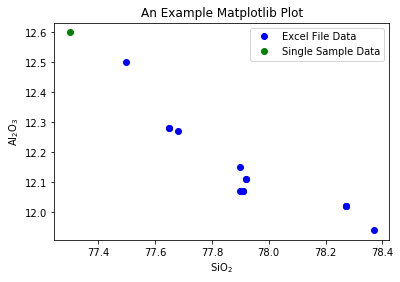

In [5]:
plt.plot(data["SiO2"], data["Al2O3"], 'o', color='blue', label="Excel File Data")
plt.plot(my_sample["SiO2"], my_sample["Al2O3"], 'o', color='green', label="Single Sample Data")
plt.xlabel("SiO$_2$")
plt.ylabel("Al$_2$O$_3$")
plt.title("An Example Matplotlib Plot")
plt.legend(loc="upper right")
plt.show()

*Figure 3 caption*

### 3.1.4 Extracting a single melt composition from a loaded file
Defined within the `ExcelFile()` class, the method `get_sample_oxide_comp()` allows for the extraction of a melt composition from a loaded excel file.

**Method structure:** `def get_sample_oxide_comp(self, sample, norm='none')`

**Required inputs:**<br>
>`sample`: The name of the sample, as a string, as defined in the 'Label' column of the input excel file.

**Optional inputs:**<br>
>`norm`: This is optional and determines the style of normalization performed on a sample. The default value is `'none'`, which returns the value-for-value un-normalized composition. Passing `'standard'` returns the composition normalized to 100%, including any volatiles. Passing `'fixedvolatiles'` normalizes the oxides to 100%, but volatiles remain fixed while other major element oxides are reduced proporitonally so that the total is 100 wt%. Passing `'anhydrous'` normalizes oxides to 100% assuming the sample is volatile-free. If H$_2$O or CO$_2$ concentrations are passed to the function, their un-normalized values will be retained in addition to the normalized non-volatile oxides, summing to >100%.

**Outputs:**<br>
>The bulk composition stored in a dictionary, with values in wt%.

In [6]:
"""To get composition from a specific sample in the input data:"""
SampleName = 'BT-ex'
extracted_bulk_comp = myfile.get_sample_oxide_comp(SampleName)

"""To see the extracted sample composition, uncomment the line below and execute this code cell"""
#extracted_bulk_comp

"""To see the sum of the composition, uncomment the line below and execute this code cell"""
#sum(extracted_bulk_comp.values())

'To see the sum of the composition, uncomment the line below and execute this code cell'

To specify a normalization style, for example the 'fixedvolatiles' normalization routine, the above code could instead be written as:<br>
`extracted_bulk_comp = myfile.get_sample_oxide_comp(SampleName, norm='fixedvolatiles')`

### 3.1.5 Normalizing and transforming data

Before performing model calculations on your data, it may be desired to normalize the input composition to a total of 100 wt%. [Tool name] has multiple methods for normalizing sample data using various routines. Normalization can be done automatically when retrieving a single sample from an Excel file, as detailed above. Each of the normalization routines can be accessed by the user at any time to normalize either a signle sample or all samples in an ExcelFile object. 

All three normalization functions can take in either a single composition as a dictionary or multiple compositions either as an ExcelFile object or a pandas DataFrame object (e.g., `yourexcelfile` or `yourexcelfile.data`). The standard normalize functino returns the composition normalized to 100%, including any volatiles. The FixedVolatiles function normalizes the oxides to 100%, but volatiles remain fixed while other major element oxides are reduced proporitonally so that the total is 100 wt%. The AdditionalVolatiles function normalizes oxides to 100% assuming the sample is volatile-free. If H$_2$O or CO$_2$ concentrations are passed to the function, their un-normalized values will be retained in addition to the normalized non-volatile oxides, summing to >100%.

**Method structures:** `def normalize(sample)`, `def normalize_FixedVolatiles(sample)`, `def normalize_AdditionalVolatiles(sample)`

**Required inputs:**<br>
>`sample` can be a dictionary containing compositional data for a single sample, an ExcelFile object containing compositional data for multiple samples, or a pandas DataFrame object containing compositional data for multiple samples. Examples are shown for all three cases below.

**Outputs:**<br>
>If a single composition is passed, a dictionary or pandas Series is returned. If multiple compositions are passed, a pandas DataFrame object is returned.

In any of the below examples, `myfile`, `myfile.data`, or `my_sample` can all be passed to any function.

In [7]:
"""Standard normalization"""
standard = m.normalize(myfile)
#print(standard)

"""FixedVolatiles normalization"""
fixed = m.normalize_FixedVolatiles(myfile)
#print(fixed)

"""AdditionalVolatiles normalization"""
additional = m.normalize_AdditionalVolatiles(myfile)
#print(additional)

### Table 2. Viewing extracted sample composition
The user may wish to print extracted sample composition to a terminal or notebook cell to verify that the correct data was extracted. Using the current example, this can be done simpy by typing `print(extracted_bulk_comp)`. However, [toolname] also has a built in function to display these values as a table, rather than as a list of values.

The `printTable(myDict)` function takes in any python dictionary and converts it to a pandas DataFrame, which can then be displayed in an aesthetically pleasing format.

**Method structure:** `def printTable(myDict)`

**Required inputs:**<br>
>`myDict` is any python dictionary

**Outputs:**<br>
>A pandas DataFrame is returned.

In [8]:
"""Execute the following line to print the data as a list of values"""
print(extracted_bulk_comp)

"""Execute the following line to display Table 2 and print the data as a table."""
m.printTable(extracted_bulk_comp)

{'SiO2': 77.5, 'TiO2': 0.08, 'Al2O3': 12.5, 'Fe2O3': 0.207, 'Cr2O3': 0.0, 'FeO': 0.473, 'MnO': 0.0, 'MgO': 0.03, 'NiO': 0.0, 'CoO': 0.0, 'CaO': 0.43, 'Na2O': 3.98, 'K2O': 4.88, 'P2O5': 0.0, 'H2O': 5.5, 'CO2': 0.05}


,value
SiO2,77.500
TiO2,0.080
Al2O3,12.500
Fe2O3,0.207
Cr2O3,0.000
FeO,0.473
MnO,0.000
MgO,0.030
NiO,0.000
CoO,0.000


## 3.2. Calculating dissolved volatile concentrations
The `calculate_dissolved_volatiles()` function calcutions the concentration of dissolved H$_2$O and CO$_2$ in the liquid at a given pressure-temperature condition and with a given H$_2$O-CO$_2$ fluid composition, defined as the mole fraction of H$_2$O in an H$_2$O-CO$_2$ fluid (XH$_2$O$^{fluid}$). The default MagmaSat model relies on the underlying functionatlity of MELTS, whose basic function is to calculate the equilibrium phase assemblage given the bulk composition of the system and pressure-temperature conditions. To calculate dissolved volatile concentrations thus requires computing the equilibrium state of a system at fixed pressure and temperature over a range of bulk volatile concentrations until a solution is found that satisfies the user defined fluid composition.

First, the function makes an initial guess at the appropriate bulk volatile concentrations by finding the minimum dissolved volatile concentrations in the liquid at saturation, while asserting that the weight fraction of H$_2$O/$\Sigma$volatiles in the system is equal to the user input mole fraction of H$_2$O/$\Sigma$volatiles in the fluid. This is done by increasing the H$_2$O and CO$_2$ concentrations appropriately until a fluid phase is stable. Once fluid saturation is determined, the code then performs directional, iterative, and progressively more refined searches, increasing the proportion of H$_2$O or CO$_2$ in the system if the mole fraction of H$_2$O calculated in the fluid is greater than or less than that defined by the user, respectively. Four iterative searches are performed; the precision of the match between the calculated and defined XH$_2$O$^{fluid}$ increases from 0.1 in the first iteration to 0.01, 0.001, and finally to 0.0001. Thus, the calculated dissolved volatile concentrations correspond to a system with XH$_2$O$^{fluid}$ within 0.0001 of the user defined value.

#SimonTODO can you write more details about how the other functions calculate dissolved volatiles? It's much more straightforward with the other models, since you can directly access fugacity, etc.

#TODO note how batch calcs are slow :(

**Method structure:**<br>
> Single sample: `def calculate_dissolved_volatiles(self, sample, temperature, pressure, X_fluid=1, verbose=False).result`

>ExcelFile batch process: `def calculate_dissolved_volatiles(self, temperature, pressure, X_fluid=1, print_status=False)`

**Required inputs:**<br>
>`sample`: *Only for single-sample calculations.* The composition of a sample. A single sample may be passed as a dictionary of values, with compositions of oxides in wt%.

>`temperature`, `pressure`, and `X_fluid`: the temperature in $^{\circ}$C, the pressure in bars, and the mole fraction of H$_2$O in the H$_2$O-CO$_2$ fluid, XH$_2$O$^{fluid}$. Temperature and pressure of the sample or samples must be passed unless an ExcelFile object with a column for temperature and/or pressure is passed to `sample`. XH$_2$O$^{fluid}$ is optional, with a default value of 1 (pure H$_2$O fluid). If a numerical (float) value is passed for either temperature, pressure, or X_fluid, that will be the value used for one or all samples. If, alternatively, the user wishes to use temperature, pressure, and/or X_fluid information in their ExcelFile object, the title of the column containing temperature, pressure, or X_fluid data should be passed in quotes (as a string) to `temperature`,  `pressure`, and/or `X_fluid`, respectively. Note for batch calculations that if temperature, pressure, or XH$_2$O$^{fluid}$ information exists in the ExcelFile but a single numerical value is defined for one or both of these variables, both the original information plus the values used for the calculations will be returned.

**Optional inputs:**<br>
>`verbose`: *Only for single-sample calculations.* Default value is False. If set to True, additional parameters are returned in a dictionary: H$_2$O and CO$_2$ concentrations in the fluid in mole fraction, temperature, pressure, and proportion of the fluid in the system in wt%.

> `print_status`: *Only for ExcelFile batch calcualtions.* The default value is False. If True is passed, the progress of the calculation will be printed to the terminal. The user may desire to see the status of the calculation, as this particular function can be quite slow, averaging between 3-5 seconds per sample. #TODO test this more and verify average compute time.

**Calculated outputs:**<br>
>If a single sample is passed to `sample`, a dictionary with keys 'H2O' and 'CO2' corresponding to the calculated dissolved H$_2$O and CO$_2$ concentrations in the liquid is returned (plus additional variables 'temperature' in $^{\circ}$C, 'pressure' in bars, 'XH2O_fl', 'XCO2_fl', and 'FluidProportion_wtper' (the proportion of the fluid in the system in wt%) if `verbose` is set to True). 

>If mutliple samples are passed as an ExcelFile object, a pandas DataFrame is returned with sample information plus calculated dissolved H$_2$O and CO$_2$ concentrations in the liquid, the fluid composition in mole fraction, and the proportion of the fluid in the system in wt%. Pressure (in bars) and Temperature (in $^{\circ}$C) columns are always returned.

In [9]:
"""To get composition from a specific sample in the input data:"""
SampleName = 'BT-ex'
bulk_comp = myfile.get_sample_oxide_comp(SampleName, norm='standard')

"""Calculate dissolved volatiles for the extracted sample"""
m.calculate_dissolved_volatiles(sample=bulk_comp, temperature=900.0, pressure=2000.0, 
                                X_fluid=0.5, verbose=True).result

{'temperature': 900.0,
 'pressure': 2000.0,
 'H2O_liq': 3.40607914678815,
 'CO2_liq': 0.0703972304204605,
 'XH2O_fl': 0.500069346677464,
 'XCO2_fl': 0.499930653322536,
 'FluidProportion_wt': 0.044348769048482936}

In [10]:
"""Calculate dissolved for all samples in an ExcelFile object"""
dissolved = myfile.calculate_dissolved_volatiles(temperature=900.0, pressure=1000.0, X_fluid=0.5, print_status=True)

Calculating sample number 1
Calculating sample number 2
Calculating sample number 3
Calculating sample number 4
Calculating sample number 5
Calculating sample number 6
Calculating sample number 7
Calculating sample number 8
Calculating sample number 9
Calculating sample number 10
Calculating sample number 11
Calculating sample number 12
Calculating sample number 13
Calculating sample number 14


In [11]:
dissolved

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,Press,Temp,H2O_liq,CO2_liq,XH2O_fl,XCO2_fl,FluidProportion_wt,Temperature_C,Pressure_bars,X_fluid_input
Label,,,,,,,,,,,,,,,,,,,,,
BT-ex,77.50,0.0800,12.50,0.207,0,0.4730,0.0000,0.0300,0,0,...,500,900,2.384672,0.032454,0.499960,0.500040,0.091590,900.0,1000.0,0.5
TVZMa-ex,78.37,0.1300,11.94,0.000,0,0.9900,0.0400,0.0500,0,0,...,600,800,2.404062,0.034602,0.500094,0.499906,0.121064,900.0,1000.0,0.5
TVZOh-ex,77.90,0.0800,12.15,0.000,0,0.9500,0.0500,0.0600,0,0,...,50,900,2.408105,0.033432,0.500097,0.499903,0.113641,900.0,1000.0,0.5
Oh48-FTIR1-MI1-a,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,250,950,2.412488,0.033670,0.500095,0.499905,0.090231,900.0,1000.0,0.5
Oh48-FTIR1-MI1-b,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,500,1025,2.412488,0.033670,0.500095,0.499905,0.090231,900.0,1000.0,0.5
Oh48-FTIR1-MI1-IRc,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,5000,925,2.412488,0.033670,0.500095,0.499905,0.090231,900.0,1000.0,0.5
Oh50-4.1,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,1000,862,2.405300,0.033612,0.500095,0.499905,0.115852,900.0,1000.0,0.5
Oh50-4.2,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,100,770,2.405300,0.033612,0.500095,0.499905,0.115852,900.0,1000.0,0.5
Oh49-4.1,77.92,0.0099,12.11,0.000,0,1.0020,0.0672,0.0546,0,0,...,1000,855,2.410394,0.033393,0.500093,0.499907,0.097344,900.0,1000.0,0.5


## 3.3. Calculating equilibrium fluid compositions
The `calculate_equilibrium_fluid_comp()` function calculates the composition of a fluid phase in equilibrium with a given silicate melt with known pressure, temperature, and dissolved H$_2$O and CO$_2$ concentrations. The calculation is performed simply by calculating the equilibrium state of the given sample at the given conditions and determining if that melt is fluid saturated. If the melt is saturated, fluid composition and mass are reported back. If the calculation finds that the melt is not saturated at the given pressure and temperature, values of 0.0 will be returned for the H$_2$O and CO$_2$ concentrations in the fluid.

#SimonTODO can you write more details about how the other functions calculate equilibrium fluid comps?

#TODO - Kayla, add examples of converting fluid compositions between molfrac and wt%

**Method structure:**<br>
>Single sample: `def calculate_equilibrium_fluid_comp(self, sample, temperature, pressure, mode='wtper', verbose=False).result`

>ExcelFile batch process: `def calculate_equilibrium_fluid_comp(self, temperature, pressure, mode='wtper')`

**Required inputs:**<br>
>`sample`: *Only for single-sample calculations.* The composition of a sample. A single sample may be passed as a dictionary of values, with compositions of oxides in wt%.

>`temperature` and `pressure`: the temperature in $^{\circ}$C and the pressure in bars. Temperature and pressure of the sample or samples must be passed unless an ExcelFile object with a column for temperature and/or pressure is passed to `sample`. If a numerical (float) value is passed for either temperature or pressure, that will be the value used for one or all samples. If, alternatively, the user wishes to use temperature and/or pressure information in their ExcelFile object, the title of the column containing temperature or pressure data should be passed in quotes (as a string) to `temperature` and `pressure`, respectively. Note for batch calculations that if pressure or temperature information exists in the ExcelFile but a single numerical value is defined for one or both of these variables, both the original pressure and temperature information plus the pressure and temperature values used for the calculations will be returned.

**Optional inputs:**<br>
>`mode`: The default value is 'molfrac', which returns the fluid composition in mole fraction (where XH$_2$O=1 is a pure H$_2$O fluid, and XH$_2$O=0 is a pure CO$_2$ fluid). Passing `wtper` returns the fluid composition in wt% oxides.

>`verbose`: *Only for single-sample calculations.* Default value is False. If set to True, additional parameters are returned in a dictionary: H$_2$O and CO$_2$ concentrations in the fluid, mass of the fluid in grams, and proportion of the fluid in the system in wt%. 

**Calculated outputs:**<br>
>If a single sample is passed to `sample`, a dictionary with keys 'H2O' and 'CO2' is returned (plus additional variables 'FluidMass_grams' and 'FluidProportion_wtper' if `verbose` is set to True). 

>If mutliple samples are passed as an ExcelFile object, a pandas DataFrame is returned with sample information plus calculated equilibrium fluid compositions, mass of the fluid in grams, and proportion of the fluid in the system in wt%. Pressure (in bars) and Temperature (in $^{\circ}$C) columns are always returned.

In [5]:
"""To get composition from a specific sample in the input data:"""
SampleName = 'BT-ex'
bulk_comp = myfile.get_sample_oxide_comp(SampleName, norm='standard')

"""Calculate fluid composition for the extracted sample"""
m.calculate_equilibrium_fluid_comp(sample=bulk_comp, temperature=900.0, pressure=200.0).result

{'H2O': 0.994827342423312, 'CO2': 0.00517265757668763}

In [6]:
"""Calculate fluid composition for all samples in an ExcelFile object"""
eqfluid = myfile.calculate_equilibrium_fluid_comp(temperature=900.0, pressure=200.0)
eqfluid

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,H2O,CO2,Press,Temp,XH2O_fl,XCO2_fl,FluidMass_grams,FluidProportion_wt,Temperature_C,Pressure_bars
Label,,,,,,,,,,,,,,,,,,,,,
BT-ex,77.50,0.0800,12.50,0.207,0,0.4730,0.0000,0.0300,0,0,...,5.500000,0.050000,500,900,0.994834,0.005166,3.986275,3.773810,900.0,200.0
TVZMa-ex,78.37,0.1300,11.94,0.000,0,0.9900,0.0400,0.0500,0,0,...,4.060000,0.005000,600,800,0.999177,0.000823,2.485281,2.388430,900.0,200.0
TVZOh-ex,77.90,0.0800,12.15,0.000,0,0.9500,0.0500,0.0600,0,0,...,4.630000,0.005000,50,900,0.999330,0.000670,3.054137,2.921362,900.0,200.0
Oh48-FTIR1-MI1-a,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,4.214912,0.004566,250,950,0.999291,0.000709,2.634159,2.527393,900.0,200.0
Oh48-FTIR1-MI1-b,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,4.005816,0.004448,500,1025,0.999250,0.000750,2.424985,2.331377,900.0,200.0
Oh48-FTIR1-MI1-IRc,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,3.885649,0.004654,5000,925,0.999174,0.000826,2.305100,2.218678,900.0,200.0
Oh50-4.1,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,4.641843,0.004566,1000,862,0.999391,0.000609,3.065981,2.929815,900.0,200.0
Oh50-4.2,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,4.402133,0.004448,100,770,0.999355,0.000645,2.826198,2.706884,900.0,200.0
Oh49-4.1,77.92,0.0099,12.11,0.000,0,1.0020,0.0672,0.0546,0,0,...,4.283934,0.004566,1000,855,0.999310,0.000690,2.704896,2.593461,900.0,200.0


In [7]:
"""Calculate fluid composition for all samples with unique pressure and temperature values for each sample.
Pressure and temperature values are taken from columns named "Press" and "Temp" in the example ExcelFile"""

eqfluid_wtemps = myfile.calculate_equilibrium_fluid_comp(temperature='Temp', pressure='Press')
eqfluid_wtemps

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,K2O,P2O5,H2O,CO2,Press,Temp,XH2O_fl,XCO2_fl,FluidMass_grams,FluidProportion_wt
Label,,,,,,,,,,,,,,,,,,,,,
BT-ex,77.50,0.0800,12.50,0.207,0,0.4730,0.0000,0.0300,0,0,...,4.88,0.0000,5.500000,0.050000,500,900,0.992732,0.007268,2.831404,2.680493
TVZMa-ex,78.37,0.1300,11.94,0.000,0,0.9900,0.0400,0.0500,0,0,...,4.14,0.0000,4.060000,0.005000,600,800,0.997852,0.002148,0.937995,0.901441
TVZOh-ex,77.90,0.0800,12.15,0.000,0,0.9500,0.0500,0.0600,0,0,...,4.12,0.0000,4.630000,0.005000,50,900,0.999477,0.000523,3.914307,3.744136
Oh48-FTIR1-MI1-a,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,4.09,0.0000,4.214912,0.004566,250,950,0.999230,0.000770,2.423435,2.325209
Oh48-FTIR1-MI1-b,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,4.09,0.0000,4.005816,0.004448,500,1025,0.998615,0.001385,1.302451,1.252174
Oh48-FTIR1-MI1-IRc,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,4.09,0.0000,3.885649,0.004654,5000,925,0.000000,0.000000,0.000000,0.000000
Oh50-4.1,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,4.18,0.0000,4.641843,0.004566,1000,862,0.995437,0.004563,0.379372,0.362523
Oh50-4.2,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,4.18,0.0000,4.402133,0.004448,100,770,0.999452,0.000548,3.324396,3.184050
Oh49-4.1,77.92,0.0099,12.11,0.000,0,1.0020,0.0672,0.0546,0,0,...,4.30,0.0000,4.283934,0.004566,1000,855,0.980412,0.019588,0.064820,0.062150


### 3.3.1. Converting fluid composition units
The fluid composition is always returned in units of mol fraction. Two functions exist to transform only the H$_2$O-CO$_2$ fluid composition between mol fraction and wt% and can easily be applied to returned data sets from calculations. Both functions require that the user provide the dataframe containing fluid composition information plus the names of the columns corresponding to the H$_2$O and CO$_2$ concentrations in the fluid. The default values for column names are set to those that may be returned by [toolname] core calculations, such that they need not be specified unless the user has change them or is supplying their own data (e.g., imported data not processed through a core calcuation).

**Method structure:**<br>
>Mol fraction to wt%: `def fluid_molfrac_to_wt(data, H2O_colname='XH2O_fl', CO2_colname='XCO2_fl')`

>Wt% to mol fraction: `def fluid_wt_to_molfrac(data, H2O_colname='H2O_fl_wt', CO2_colname='CO2_fl_wt')`

**Required inputs:**<br>
>`data`: A pandas DataFrame containing columns for H$_2$O and CO$_2$ concentrations in the fluid.

**Optional inputs:**<br>
>`H2O_colname` and `CO2_colname`: The default values are 'XH2O_fl' and 'XCO2_fl' if input data are in mol fraction or 'H2O_fl_wt' and 'CO2_fl_wt' if the data are in wt%. Strings containing the name of the columns corresponding to the H$_2$O and CO$_2$ concentrations in the fluid.

**Calculated outputs:**<br>
>The original data passed plus newly calculated values are returned in a DataFrame.

In [8]:
"""Converting from mol fraction to wt%"""
eqfluid_wt = m.fluid_molfrac_to_wt(eqfluid)
eqfluid_wt

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,Press,Temp,XH2O_fl,XCO2_fl,FluidMass_grams,FluidProportion_wt,Temperature_C,Pressure_bars,H2O_fl_wt,CO2_fl_wt
Label,,,,,,,,,,,,,,,,,,,,,
BT-ex,77.50,0.0800,12.50,0.207,0,0.4730,0.0000,0.0300,0,0,...,500,900,0.994834,0.005166,3.986275,3.773810,900.0,200.0,98.747659,1.252341
TVZMa-ex,78.37,0.1300,11.94,0.000,0,0.9900,0.0400,0.0500,0,0,...,600,800,0.999177,0.000823,2.485281,2.388430,900.0,200.0,99.799315,0.200685
TVZOh-ex,77.90,0.0800,12.15,0.000,0,0.9500,0.0500,0.0600,0,0,...,50,900,0.999330,0.000670,3.054137,2.921362,900.0,200.0,99.836616,0.163384
Oh48-FTIR1-MI1-a,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,250,950,0.999291,0.000709,2.634159,2.527393,900.0,200.0,99.827063,0.172937
Oh48-FTIR1-MI1-b,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,500,1025,0.999250,0.000750,2.424985,2.331377,900.0,200.0,99.817032,0.182968
Oh48-FTIR1-MI1-IRc,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,5000,925,0.999174,0.000826,2.305100,2.218678,900.0,200.0,99.798607,0.201393
Oh50-4.1,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,1000,862,0.999391,0.000609,3.065981,2.929815,900.0,200.0,99.851377,0.148623
Oh50-4.2,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,100,770,0.999355,0.000645,2.826198,2.706884,900.0,200.0,99.842658,0.157342
Oh49-4.1,77.92,0.0099,12.11,0.000,0,1.0020,0.0672,0.0546,0,0,...,1000,855,0.999310,0.000690,2.704896,2.593461,900.0,200.0,99.831574,0.168426


In [11]:
"""Converting from wt% to mol fraction"""
eqfluid_mol = m.fluid_wt_to_molfrac(eqfluid_wt)
eqfluid_mol

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,Press,Temp,XH2O_fl,XCO2_fl,FluidMass_grams,FluidProportion_wt,Temperature_C,Pressure_bars,H2O_fl_wt,CO2_fl_wt
Label,,,,,,,,,,,,,,,,,,,,,
BT-ex,77.50,0.0800,12.50,0.207,0,0.4730,0.0000,0.0300,0,0,...,500,900,0.994834,0.005166,3.986275,3.773810,900.0,200.0,98.747659,1.252341
TVZMa-ex,78.37,0.1300,11.94,0.000,0,0.9900,0.0400,0.0500,0,0,...,600,800,0.999177,0.000823,2.485281,2.388430,900.0,200.0,99.799315,0.200685
TVZOh-ex,77.90,0.0800,12.15,0.000,0,0.9500,0.0500,0.0600,0,0,...,50,900,0.999330,0.000670,3.054137,2.921362,900.0,200.0,99.836616,0.163384
Oh48-FTIR1-MI1-a,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,250,950,0.999291,0.000709,2.634159,2.527393,900.0,200.0,99.827063,0.172937
Oh48-FTIR1-MI1-b,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,500,1025,0.999250,0.000750,2.424985,2.331377,900.0,200.0,99.817032,0.182968
Oh48-FTIR1-MI1-IRc,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,5000,925,0.999174,0.000826,2.305100,2.218678,900.0,200.0,99.798607,0.201393
Oh50-4.1,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,1000,862,0.999391,0.000609,3.065981,2.929815,900.0,200.0,99.851377,0.148623
Oh50-4.2,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,100,770,0.999355,0.000645,2.826198,2.706884,900.0,200.0,99.842658,0.157342
Oh49-4.1,77.92,0.0099,12.11,0.000,0,1.0020,0.0672,0.0546,0,0,...,1000,855,0.999310,0.000690,2.704896,2.593461,900.0,200.0,99.831574,0.168426


## 3.4. Calculating saturation pressures
The `calculate_saturation_pressure()` function calculates the minimum pressure at which a given silicate melt with known temperature and H$_2$O and CO$_2$ concentrations would be saturated with fluid. This is calcualted by finding the pressure at which the smallest amount of vapor is present. This function also calculates the composition of the vapor in equilibrium with the melt at those conditions.

The function works by calculating the equilibrium state of the given melt at very high pressure (2,000 MPa) and then decreasing the pressure in steps of 100 MPa until the mass of vapor is >0 grams. At this point, the pressure space is narrowed and searched in steps of 10 MPa and then in steps of 1 MPa until the saturation pressure is found.

**Method structure:**<br>
>Single sample: `def calculate_saturation_pressure(self, sample, temperature, verbose=False).result`

>ExcelFile batch process: `def calculate_saturation_pressure(self, temperature, print_status=False)`

**Required inputs:**<br>
> `sample`: *Only for single-sample calculations.* The composition of the melt, inclusing the H$_2$O and CO$_2$ concentrations, in wt%.

> `temperature`: The temperature in °C. For ExcelFile batch calculations, if temperature information is present in the ExcelFile (e.g., as a column with unique temperature values for each sample), this can be accessed by passing the column name in quotes to the temperature variable.

**Optional inputs:**<br>
> `verbose`: *Only for single-sample calculations.* Default value is False. If set to True, additional parameters are returned in a dictionary: saturation pressure in bars, H$_2$O and CO$_2$ concentrations in the fluid, mass of the fluid in grams, and proportion of the fluid in the system in wt%.

> `print_status`: *Only for ExcelFile batch calcualtions.* The default value is False. If True is passed, the progress of the calculation will be printed to the terminal.

**Calculated outputs:**<br>
>If a single sample is passed to `sample`, the saturation pressure in bars is returned as a numerical value (float) (plus additional variables 'XH2O_fl', 'XCO2_fl', 'FluidMass_grams', and 'FluidProportion_wtper' if `verbose` is set to True). 

>If mutliple samples are passed as an ExcelFile object, a pandas DataFrame is returned with sample information plus calculated saturation pressures, equilibrium fluid compositions, mass of the fluid in grams, and proportion of the fluid in the system in wt%. Temperature (in $^{\circ}$C) is always returned.

In [12]:
"""Calculate the saturation pressure of the single sample we defined in Section 3.1.2 at 925 degrees C"""
m.calculate_saturation_pressure(sample=my_sample, temperature=925.0, verbose=True).result

{'SaturationP_bars': 2720.0,
 'FluidMass_grams': 0.0016655984224872,
 'FluidProportion_wt': 0.0015635017577088073,
 'XH2O_fl': 0.825802671679744,
 'XCO2_fl': 0.174197328320256}

In [13]:
"""Calculate the saturation pressure for all samples in an ExcelFile object at 925 degrees C"""
satPs = myfile.calculate_saturation_pressure(temperature=925.0)
satPs

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,H2O,CO2,Press,Temp,XH2O_fl,XCO2_fl,SaturationP_bars,FluidMass_grams,FluidSystem_wt,Temperature_C
Label,,,,,,,,,,,,,,,,,,,,,
BT-ex,77.50,0.0800,12.50,0.207,0,0.4730,0.0000,0.0300,0,0,...,5.500000,0.050000,500,900,0.768140,0.231860,2310.0,0.000848,0.000803,925.0
TVZMa-ex,78.37,0.1300,11.94,0.000,0,0.9900,0.0400,0.0500,0,0,...,4.060000,0.005000,600,800,0.942370,0.057630,1010.0,0.001808,0.001737,925.0
TVZOh-ex,77.90,0.0800,12.15,0.000,0,0.9500,0.0500,0.0600,0,0,...,4.630000,0.005000,50,900,0.954437,0.045563,1220.0,0.003163,0.003025,925.0
Oh48-FTIR1-MI1-a,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,4.214912,0.004566,250,950,0.951611,0.048389,1050.0,0.004152,0.003984,925.0
Oh48-FTIR1-MI1-b,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,4.005816,0.004448,500,1025,0.944058,0.055942,980.0,0.000797,0.000767,925.0
Oh48-FTIR1-MI1-IRc,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,3.885649,0.004654,5000,925,0.939087,0.060913,940.0,0.001188,0.001144,925.0
Oh50-4.1,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,4.641843,0.004566,1000,862,0.957539,0.042461,1220.0,0.001897,0.001812,925.0
Oh50-4.2,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,4.402133,0.004448,100,770,0.952830,0.047170,1130.0,0.000511,0.000490,925.0
Oh49-4.1,77.92,0.0099,12.11,0.000,0,1.0020,0.0672,0.0546,0,0,...,4.283934,0.004566,1000,855,0.951000,0.049000,1080.0,0.002577,0.002470,925.0


In [14]:
"""Calculate the saturation pressure for all samples in an ExcelFile object, taking temperature
values from a column named "Temp" in the ExcelFile"""
satPs_wtemps = myfile.calculate_saturation_pressure(temperature="Temp")
satPs_wtemps

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,P2O5,H2O,CO2,Press,Temp,XH2O_fl,XCO2_fl,SaturationP_bars,FluidMass_grams,FluidSystem_wt
Label,,,,,,,,,,,,,,,,,,,,,
BT-ex,77.50,0.0800,12.50,0.207,0,0.4730,0.0000,0.0300,0,0,...,0.0000,5.500000,0.050000,500,900,0.768328,0.231672,2320.0,0.001276,0.001208
TVZMa-ex,78.37,0.1300,11.94,0.000,0,0.9900,0.0400,0.0500,0,0,...,0.0000,4.060000,0.005000,600,800,0.941901,0.058099,1000.0,0.002468,0.002372
TVZOh-ex,77.90,0.0800,12.15,0.000,0,0.9500,0.0500,0.0600,0,0,...,0.0000,4.630000,0.005000,50,900,0.952864,0.047136,1220.0,0.001731,0.001656
Oh48-FTIR1-MI1-a,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,0.0000,4.214912,0.004566,250,950,0.948753,0.051247,1060.0,0.001247,0.001197
Oh48-FTIR1-MI1-b,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,0.0000,4.005816,0.004448,500,1025,0.949904,0.050096,990.0,0.003600,0.003461
Oh48-FTIR1-MI1-IRc,78.27,0.0298,12.02,0.000,0,0.9828,0.0336,0.0515,0,0,...,0.0000,3.885649,0.004654,5000,925,0.939087,0.060913,940.0,0.001188,0.001144
Oh50-4.1,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,0.0000,4.641843,0.004566,1000,862,0.958641,0.041359,1210.0,0.003838,0.003668
Oh50-4.2,77.91,0.0984,12.07,0.000,0,1.0556,0.0257,0.0999,0,0,...,0.0000,4.402133,0.004448,100,770,0.955742,0.044258,1120.0,0.003793,0.003633
Oh49-4.1,77.92,0.0099,12.11,0.000,0,1.0020,0.0672,0.0546,0,0,...,0.0000,4.283934,0.004566,1000,855,0.950880,0.049120,1070.0,0.003295,0.003159


## 3.5. Calculating and plotting isobars and isopleths
In this example, we demonstrate how isobars (lines of constant pressure) and isopleths (lines of constant fluid composition) can be calculated for any one composition. A single melt composition can be extracted from a loaded excel file, or a composition can be enterred by hand an stored within a dictionary. Due to computational intensity, isobars and isopleths can only be computed for one sample composition at a time.

Once a single composition is defined, conditions over which to calculate isobars and isopleths must be specified. The generated plot is isothermal, so only one temperature can be chosen. Isobars can be calculated for any number of pressures, passed as a list.

The calculation is performed by iterating through possible concentrations of H$_2$O and CO$_2$ and calculating the equilibrium state for the system. The iteration begins at a fixed H$_2$O concentration, increasing the CO$_2$ concentration in steps of 0.1 wt% until a fluid phase is stable. The H$_2$O concentration is then increased by 0.5 wt% and CO$_2$ is again increased from 0 until a fluid phase is stable. This process is repeated for H$_2$O values ranging from 0–15 wt%. The H$_2$O and CO$_2$ concentrations from each system for which a fluid phase was found to be stable are saved and written to a pandas DataFrame, which is returned upon completion of the calculation.

**Method structure:**<br>
>*Only single-sample calculations.* `def calculate_isobars_and_isopleths(self, sample, temperature, pressure_list, isopleth_list, print_status=False).result`

**Required inputs:**<br>
>`sample`: The sample composition, as a dictionary with values in wt%

>`temperature`: The temperature in $^{\circ}$C. 

>`pressure_list`: A list of all pressures in bars at which to calculate isobars.

**Optional inputs:**<br>
>`isopleth_list`: The default value is None in which case only isobars will be calcualted. A list of all fluid composition values, in mole fraction H$_2$O (XH$_2$O$^{fluid}$), at which to calculate isopleths. Values can range from 0–1.

>`print_status`: The default value is False. If set to `True`, the progress of the calculations will be printed to the terminal.

**Calculated outputs:** 
>The function returns two pandas DataFrames: the first has isobar data, and the second has isopleth data. Columns in the isobar dataframe are 'Pressure', 'H2Omelt', and 'CO2melt', correpsonding to pressure in bars and dissolved H$_2$O and CO$_2$ in the liquid in wt%. Columns in the isopleth dataframe are 'XH2O_fl', 'H2O_liq', and 'CO2_liq', corresponding to XH$_2$O$^{fluid}$ and dissolved H$_2$O and CO$_2$ in the liquid in wt%.

In [ ]:
"""To get composition from a specific sample in the input data:"""
SampleName = 'BT-ex'
bulk_comp = myfile.get_sample_oxide_comp(SampleName, norm='standard')

"""Define all variables to be passed to the function for calculating isobars and isopleths"""
"""Define the temperature in degrees C"""
temperature = 1000.0

"""Define a list of pressures in bars:"""
pressures = [1000.0, 2000.0, 3000.0]

Next, the H$_2$O and CO$_2$ dissolved in the melt at saturation is calculated at the specified temperature and over the range of specified pressures. The user does not need to change anything in the below cell.

In [ ]:
isobars, isopleths = m.calculate_isobars_and_isopleths(sample=bulk_comp, 
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0.25,0.5,0.75],
                                            print_status=True).result

### 3.5.2. Plotting isobars and isopleths

Once isobars and isopleths are calculated, they can be plotted in an H$_2$O versus CO$_2$ plot with one simple function call. The plot will be printed directly in the notebook or, if the code is run as script in a command line, the plot will appear it its own window, at which point it can be saved as an image file. The `plot_isobars_and_isopleths` function takes in a pandas DataFrame with calculated isobar and isopleth information (e.g., output from calculate_isobars_and_isopleths) and plots data as isobars (lines of constant pressure) and isopleths (lines of constant fluid composition). These lines represent the saturation pressures of the melt composition used to calculate the isobar and isopleth information. 

**Method structure:**<br>
>*Only single-sample calculations.* `def plot_isobars_and_isopleths(self, isobars, isopleths)`

**Required inputs:**<br>
>`isobars`: Pandas DataFrame object containing isobar information as calculated by calculate_isobars_and_isopleths.

>`isopleths`: Pandas DataFrame object containing isopleth information as calculated by calculate_isobars_and_isopleths.

**Calculated outputs:** 
>The function returns a matplotlib object with the x-axis as H2O wt% in the melt and y-axis as CO2 wt% in the melt. Isobars, or lines of constant pressure at which the sample magma composition is saturated, and isopleths, or lines of constant fluid composition at which the sample magma composition is saturated, are plotted.

In [ ]:
m.plot_isobars_and_isopleths(isobars, isopleths)

However, the user may wish to apply custom formatting to the plot, in which case, an example code to plot isobars and isopleths is provided below.

In [ ]:
"""Uncomment this entire cell to execute the code below..."""

# # #-----------------------CODE TO PLOT ISOBARS AND ISOPLETHS-----------------#
# P_vals = isobars.Pressure.unique() #grab all unique pressure values
# XH2O_vals = isopleths.XH2O_fl.unique() #grab all unique XH2O values
# isobars_lists = isobars.values.tolist() #transform isobar dataframe into a list of lists
# isopleths_lists = isopleths.values.tolist() #transform isopleth dataframe into a list of lists

# # add zero values to volatiles list
# isobars_lists.append([0.0, 0.0, 0.0, 0.0])

# # draw the figure
# fig, ax1 = plt.subplots()
# plt.xlabel('H2O wt%')
# plt.ylabel('CO2 wt%')

# # do some data smoothing
# for pressure in P_vals:
#     Pxs = [item[1] for item in isobars_lists if item[0] == pressure]
#     Pys = [item[2] for item in isobars_lists if item[0] == pressure]

#     try:
#         np.seterr(divide='ignore', invalid='ignore') #turn off numpy warning
#         ## calcualte polynomial
#         Pz = np.polyfit(Pxs, Pys, 3)
#         Pf = np.poly1d(Pz)

#         ## calculate new x's and y's
#         Px_new = np.linspace(Pxs[0], Pxs[-1], 50)
#         Py_new = Pf(Px_new)

#         # Plot some stuff
#         ax1.plot(Px_new, Py_new)
#     except:
#         ax1.plot(Pxs, Pys)

# for Xfl in XH2O_vals:
#     Xxs = [item[1] for item in isopleths_lists if item[0] == Xfl]
#     Xys = [item[2] for item in isopleths_lists if item[0] == Xfl]

#     try:
#         ## calcualte polynomial
#         Xz = np.polyfit(Xxs, Xys, 2)
#         Xf = np.poly1d(Xz)

#         ## calculate new x's and y's
#         Xx_new = np.linspace(Xxs[0], Xxs[-1], 50)
#         Xy_new = Xf(Xx_new)

#         # Plot some stuff
#         ax1.plot(Xx_new, Xy_new, ls='dashed', color='k')
#     except:
#         ax1.plot(Xxs, Xys, ls='dashed', color='k')

# labels = P_vals
# ax1.legend(labels)

# np.seterr(divide='warn', invalid='warn') #turn numpy warning back on

# plt.show()

# Need to fix this...
## 3.6. Calculating and plotting degassing paths

Define open vs closed system degassing.

In [ ]:
#To get composition from a specific sample in the input data:
SampleName = 'BT-ex'
bulk_comp = myfile.get_sample_oxide_comp(SampleName)
bulk_comp = m.normalize(bulk_comp)

temp = 900.0 #temperature in °C

#Calculate open, closed, and closed + 2 wt% initial vapor
open_df = m.MagmaSat().calculate_degassing_paths(sample=bulk_comp, temperature=temp, fractionate_vapor=0.0)
half_df = m.MagmaSat().calculate_degassing_paths(sample=bulk_comp, temperature=temp, fractionate_vapor=0.5)
closed_df = m.MagmaSat().calculate_degassing_paths(sample=bulk_comp, temperature=temp)
exsolved_df = m.MagmaSat().calculate_degassing_paths(sample=bulk_comp, temperature=temp, init_vapor=2.0)

#Plot the results
ax = open_df.plot(kind='line',x='H2O_liq',y='CO2_liq',color='red', label='Open System')
half_df.plot(ax=ax, kind='line', x='H2O_liq', y='CO2_liq', color='purple', label='0.5 vapor')
closed_df.plot(ax=ax, kind='line',x='H2O_liq',y='CO2_liq',color='blue', label='Closed System')
exsolved_df.plot(ax=ax, kind='line', x='H2O_liq', y='CO2_liq',color='green', label='Closed System w/2 wt% Vapor')
ax.scatter(bulk_comp["H2O"], bulk_comp["CO2"], color='black') #Plot original data point

ax.set_xlabel("H2O, wt%")
ax.set_ylabel("CO2, wt%")
plt.show()

## 3.7. Plotting multiple calculations

In [ ]:
#PLOT ISOBARS
P_vals = isobars.Pressure.unique() #grab all unique pressure values
XH2O_vals = isopleths.XH2O_fl.unique() #grab all unique XH2O values
isobars_lists = isobars.values.tolist() #transform isobar dataframe into a list of lists
isopleths_lists = isopleths.values.tolist() #transform isopleth dataframe into a list of lists

# add zero values to volatiles list
isobars_lists.append([0.0, 0.0, 0.0, 0.0])

#To get composition from a specific sample in the input data:
SampleName = 'BT-ex'
bulk_comp = myfile.get_sample_oxide_comp(SampleName)
bulk_comp = m.normalize(bulk_comp)

temp = 900.0 #temperature in °C

#Calculate open, closed, and closed + 2 wt% initial vapor
#open_df = m.MagmaSat().calculate_degassing_paths(sample=bulk_comp, temperature=temp, fractionate_vapor=0.0)
#half_df = m.MagmaSat().calculate_degassing_paths(sample=bulk_comp, temperature=temp, fractionate_vapor=0.5)
#closed_df = m.MagmaSat().calculate_degassing_paths(sample=bulk_comp, temperature=temp)
#exsolved_df = m.MagmaSat().calculate_degassing_paths(sample=bulk_comp, temperature=temp, init_vapor=2.0)

#Plot the results
ax = open_df.plot(kind='line',x='H2O_liq',y='CO2_liq',color='red', label='Open System')
half_df.plot(ax=ax, kind='line', x='H2O_liq', y='CO2_liq', color='purple', label='0.5 vapor')
closed_df.plot(ax=ax, kind='line',x='H2O_liq',y='CO2_liq',color='blue', label='Closed System')
exsolved_df.plot(ax=ax, kind='line', x='H2O_liq', y='CO2_liq',color='green', label='Closed System w/2 wt% Vapor')
ax.scatter(bulk_comp["H2O"], bulk_comp["CO2"], color='black') #Plot original data point


# do some data smoothing
for pressure in P_vals:
    Pxs = [item[1] for item in isobars_lists if item[0] == pressure]
    Pys = [item[2] for item in isobars_lists if item[0] == pressure]

    try:
        np.seterr(divide='ignore', invalid='ignore') #turn off numpy warning
        ## calcualte polynomial
        Pz = np.polyfit(Pxs, Pys, 3)
        Pf = np.poly1d(Pz)

        ## calculate new x's and y's
        Px_new = np.linspace(Pxs[0], Pxs[-1], 50)
        Py_new = Pf(Px_new)

        # Plot some stuff
        ax.plot(Px_new, Py_new)
    except:
        ax.plot(Pxs, Pys)

for Xfl in XH2O_vals:
    Xxs = [item[1] for item in isopleths_lists if item[0] == Xfl]
    Xys = [item[2] for item in isopleths_lists if item[0] == Xfl]

    try:
        ## calcualte polynomial
        Xz = np.polyfit(Xxs, Xys, 2)
        Xf = np.poly1d(Xz)

        ## calculate new x's and y's
        Xx_new = np.linspace(Xxs[0], Xxs[-1], 50)
        Xy_new = Xf(Xx_new)

        # Plot some stuff
        ax.plot(Xx_new, Xy_new, ls='dashed', color='k')
    except:
        ax.plot(Xxs, Xys, ls='dashed', color='k')




ax.set_xlabel("H2O, wt%")
ax.set_ylabel("CO2, wt%")
plt.show()

## 3.8. Plotting results from multiple models
Some preamble text and list of all the things we will compare...

Dissolved volatiles...

In [ ]:
magsat_vols = m.calculate_dissolved_volatiles(sample=my_sample, temperature=900.0, 
                                pressure=2000.0, X_fluid=0.5, verbose=False).result

shish_vols = m.calculate_dissolved_volatiles(model='Shishkina', sample=my_sample, temperature=900.0,
                                pressure=2000.0, X_fluid=(0.5,0.5)).result

dix_vols = m.calculate_dissolved_volatiles(model='Dixon', sample=my_sample, temperature=900.0,
                                          pressure=2000.0, X_fluid=(0.5,0.5)).result

iac_vols = m.calculate_dissolved_volatiles(model='IaconoMarziano', sample=my_sample, temperature=900.0,
                                          pressure=2000.0, X_fluid=(0.5,0.5)).result

In [ ]:
"""
NOTE! This is where we need to implement limitations for what samples should be calculated with which models!
For examlpe, we could allow users to calculate volatiles in a rhyolite using Iacono-Marziano, but we
should warn them that they should not do that.
"""

fig, ax = plt.subplots()
plt.xlabel('H2O wt%')
plt.ylabel('CO2 wt%')
plt.xlim(0,5.0)
plt.ylim(-1.0,0.2)

ax.plot(magsat_vols["H2O"], magsat_vols["CO2"], 'o', color='blue', label="MagmaSat")
ax.plot(shish_vols[1], shish_vols[0], 'o', color='green', label="Shishkina")
ax.plot(dix_vols[1], dix_vols[0], 'o', color='red', label="Dixon")
ax.plot(iac_vols[1], iac_vols[0], 'o', color='purple', label="Iacono-Marziano")

plt.title(label="Calculate Dissolved Volatiles")
plt.legend(loc="lower left")
plt.show()

Isobars...

In [ ]:
# MS_isobars, MS_isopleths = m.calculate_isobars_and_isopleths(sample=my_sample, 
#                                             temperature=900.0,
#                                             pressure_list=[2000.0],
#                                             isopleth_list=[0.5],
#                                             print_status=True).result

Shish_isobars, Shish_isopleths = m.calculate_isobars_and_isopleths(model='Shishkina',
                                                                   sample=my_sample, 
                                                                    temperature=900.0,
                                                                    pressure_list=[2000.0],
                                                                    isopleth_list=[0.5]).result

Dix_isobars, Dix_isopleths = m.calculate_isobars_and_isopleths(model='Dixon',
                                                                   sample=my_sample, 
                                                                    temperature=900.0,
                                                                    pressure_list=[2000.0],
                                                                    isopleth_list=[0.5]).result

Iac_isobars, Iac_isopleths = m.calculate_isobars_and_isopleths(model='IaconoMarziano',
                                                                   sample=my_sample, 
                                                                    temperature=900.0,
                                                                    pressure_list=[2000.0],
                                                                    isopleth_list=[0.5]).result

# Simon, can you write this section?
## 3.9. Code hybridization (Advanced)

Some text.

## 3.10. Exporting data

Some text.

In [ ]:
myfile.save_excelfile(filename='testsave.xlsx', calculations=[dissolved, eqfluid, eqfluid_wtemps, satPs, satPs_wtemps])

# 4. Discussion and Conclusion

# 5. Future Work

# Acknowledgements

# References